# Analysis of my YouTube history

<img src="YouTube_Logo.jpeg"/>

#  Question of interest.
I started this project because YouTube is my most used social media, and I have spent a great amount of time watching videos. Naturally, I have been curious about how much time I have spent on YouTube in recent years. Additionally, I am curious about what watching trends I have and if the trends follow my expectations. Therefore, I sought to answer the following three questions:
* What year and month have I watched most YouTube videos in?
* During what days/hours am I watching the most YouTube content?
* Are there any recurring topics in the videos I've been watching?
* What are my most watched YouTube Channels in the years 2020 to 2023

In this project, we are going to analyse my personal Youtube history with Python. First, we will get my Youtube history from Google Takeout. Then we will create the dataset of this information using JSON parser and Pandas dataframes to clean the data. Then, We will analyse the dataset using Python, data analysis methods and libraries (Pandas, Matplotlib, Seaborn, etc. )

# Methodology

In the following YouTube data analysis, we use the `json` library to read the data and the `os` to locate where our data is on the computer. Transforming the data is done using the library `main.py`, which I made for extracting and sorting data, which has a dictionary equal to the JSON format from Google Takeout. The library contains the following functions:
* `split_subtitles`
* `process_yearly_data`
* `df_by_hour`

The Python file `main.py` has a description of what each function does. In the data cleaning, we use the libraries `calendar` and `daytime` to extract information from the dictionary and make them into new columns in the data frame. For the data analysis section, we use visualization tools and create descriptive statistics, all of which are produced by using the libraries `numpy`, `pandas`, `seaborn` and `matplotlib`.

### Downloading the Dataset

First I downloaded my YouTube data from [Google Takeout](https://takeout.google.com/). Google gives data in different formats where we are going to use JSON format to analyse the data. This also means we will have to use different Python modules to create final Pandas DataFrame that we can use to do our detailed analysis. 

We start by downloading the required libraries.

In [1]:
## Libraries for Importing dataset
import json
import os

## Libraries for cleaning the data
import functions as func
import calendar
import datetime

## Libraries for Data Analysis & Visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex

Matplotlib created a temporary config/cache directory at /var/folders/4n/gn473jp56y75w924k4c0zjbw0000gn/T/matplotlib-bk55kqbz because the default path (/Users/lasse/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
os.listdir('./')

['functions.py',
 'main.ipynb',
 '.DS_Store',
 'Notebook.ipynb',
 '__pycache__',
 'watch-history.json',
 '.ipynb_checkpoints',
 'YouTube_Logo.jpeg']

### Using the JSON file to create watched history dataset

In [23]:
# I specified utf-8 because of danish characters in my data
with open('/Users/lasse/Desktop/Python Projects/Project 2 - Data Analysis/Github/watch-history.json', 
          encoding="utf-8") as file:
    data = json.load(file)

We are using `json` to record each observation and storing them in a dictionary.

# Data Cleaning/transformation

In [24]:
# Load data as a Panda DataFrame
df = pd.DataFrame(data)

# Apply the split_subtitles function to each row
df[['channel_name', 'channel_url']] = df.apply(func.split_subtitles, axis=1)

# Drop the original 'subtitles' column if no longer needed
df = df.drop(columns=['subtitles'])

# Show DataFrame
df

,header,title,titleUrl,time,products,activityControls,description,details,channel_name,channel_url
0,YouTube,"Watched Install Git on MacOS (Macbook M1, M1 M...",https://www.youtube.com/watch?v=hMEyBtsuAJE,2024-02-18T15:16:21.549Z,[YouTube],[YouTube watch history],NaN,NaN,Code With Arjun,https://www.youtube.com/channel/UCJyDMA1hY0gWr...
1,YouTube,Watched Merab wrestled Bradley Martyn 😂 (via m...,https://www.youtube.com/watch?v=vlzkSH8hHqM,2024-02-18T15:02:17.549Z,[YouTube],[YouTube watch history],NaN,NaN,ESPN MMA,https://www.youtube.com/channel/UCO4AcsPKEkIqD...
2,YouTube,Watched 5 Basic Essential Tactics for NOOBS! -...,https://www.youtube.com/watch?v=KMpvjVkfhVo,2024-02-18T15:01:03.263Z,[YouTube],[YouTube watch history],NaN,NaN,Zerkovich,https://www.youtube.com/channel/UCWqIHkxwNkVTW...
3,YouTube,Watched Chargebee Founders Cut Ad,https://www.youtube.com/watch?v=MEI57XZDjVg,2024-02-18T15:00:56.474Z,[YouTube],"[Web & App Activity, YouTube watch history, Yo...",Watched at 16:00,[{'name': 'From Google Ads'}],None,None
4,YouTube,Watched Skaven Inventions in a Nutshell,https://www.youtube.com/watch?v=pUD9OEp2n3w,2024-02-18T15:00:47.482Z,[YouTube],[YouTube watch history],NaN,NaN,Tarriff,https://www.youtube.com/channel/UCYTTC8FyL-32Y...
...,...,...,...,...,...,...,...,...,...,...
48402,YouTube,Watched Bevis Arealfunktionen er en stamfunk...,https://www.youtube.com/watch?v=PZ8WNNZHmII,2020-07-12T20:57:18.686Z,[YouTube],[YouTube watch history],NaN,NaN,Annepande,https://www.youtube.com/channel/UCB8XQrQ50PZCC...
48403,YouTube,Watched Tretrinsreglen - Bevis: Differentialkv...,https://www.youtube.com/watch?v=xAYlX_LnQtc,2020-07-12T20:51:34.640Z,[YouTube],[YouTube watch history],NaN,NaN,KG MAT,https://www.youtube.com/channel/UC-93ygaunYBn4...
48404,YouTube,Watched https://www.youtube.com/watch?v=19FT6b...,https://www.youtube.com/watch?v=19FT6b9VMTY,2020-07-12T20:48:08.113Z,[YouTube],[YouTube watch history],NaN,NaN,None,None
48405,YouTube,Watched Tame Impala - On Track (Acoustic Live),https://www.youtube.com/watch?v=p3gyCbcB9EY,2020-07-12T20:46:59.003Z,[YouTube],[YouTube watch history],NaN,NaN,tameimpalaVEVO,https://www.youtube.com/channel/UCEGJtJpwHlpUo...


In [25]:
# Convert the 'details' column to a string and check for the presence of the target substring
target_string = "{'name': 'From Google Ads'}"

# Remove row given it contains the target string
df = df[~df['details'].astype(str).str.contains(target_string)]

# Reset the index
df.reset_index(drop=True, inplace=True)

In [26]:
# Remove all other unnecessary columns
df = df.drop(columns=['header', 
                       'products', 
                       'activityControls', 
                       'titleUrl', 
                       'channel_url', 
                       'details', 
                       'description'])

# Print the cleaned DataFrame that contain no Ads
df

,title,time,channel_name
0,"Watched Install Git on MacOS (Macbook M1, M1 M...",2024-02-18T15:16:21.549Z,Code With Arjun
1,Watched Merab wrestled Bradley Martyn 😂 (via m...,2024-02-18T15:02:17.549Z,ESPN MMA
2,Watched 5 Basic Essential Tactics for NOOBS! -...,2024-02-18T15:01:03.263Z,Zerkovich
3,Watched Skaven Inventions in a Nutshell,2024-02-18T15:00:47.482Z,Tarriff
4,Watched Ilia Topuria says featherweight divisi...,2024-02-18T14:53:49.346Z,ESPN MMA
...,...,...,...
45039,Watched Bevis Arealfunktionen er en stamfunk...,2020-07-12T20:57:18.686Z,Annepande
45040,Watched Tretrinsreglen - Bevis: Differentialkv...,2020-07-12T20:51:34.640Z,KG MAT
45041,Watched https://www.youtube.com/watch?v=19FT6b...,2020-07-12T20:48:08.113Z,None
45042,Watched Tame Impala - On Track (Acoustic Live),2020-07-12T20:46:59.003Z,tameimpalaVEVO


# 1. Number of YouTube videos watched
### Plotting amount of watched YouTube videos per year

In [27]:
# Set the first year as an index
distinct_years = pd.to_datetime(df['time']).dt.year.unique()
first_year = distinct_years.min()

# Extract the year, month and day from the 'time' column and create new columns
df['year'] = pd.to_datetime(df['time']).dt.year
df['month'] = pd.to_datetime(df['time']).dt.month
df['day_of_the_week'] = pd.to_datetime(df['time']).dt.day_name()


# Filter the dataset to include only rows from the first year onwards
df = df[df['year'] >= first_year]

In [28]:
# Show the amount of videos watched per year
video_count_per_year = df.groupby('year').size().reset_index(name='video_count')
video_count_per_year

,year,video_count
0,2020,4739
1,2021,11556
2,2022,12476
3,2023,13935
4,2024,2338


In [30]:
# Extract months and video watched per year using list comprehension
year = video_count_per_year['year'].tolist()
video_count = video_count_per_year['video_count'].tolist()

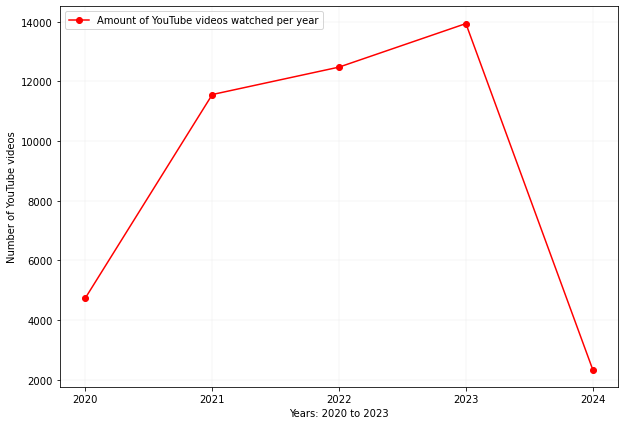

In [31]:
# Create a larger figure by specifying figsize
plt.figure(figsize=(10, 7))

# Create a line plot
plt.plot(year, 
         video_count, 
         marker='o',  
         linestyle='-',  
         color='red',  
         label="Amount of YouTube videos watched per year")

# Add a grid
plt.grid(True, linewidth=0.1)

# Label the axes
plt.xticks(year, labels=year)
plt.xlabel('Years: 2020 to 2023')
plt.ylabel('Number of YouTube videos')

# Add legend
plt.legend()

# Show the plot
plt.show()

### Aggregated amount of watched YouTube videos per month

In [33]:
# Extract the month from the table
video_count_per_month = df.groupby('month').size().reset_index(name='video_count')
video_count_per_month

,month,video_count
0,1,5169
1,2,2795
2,3,3380
3,4,2992
4,5,2210
5,6,2696
6,7,4709
7,8,4797
8,9,3420
9,10,4576


In [34]:
# Extract months and video counts using list comprehension
months = video_count_per_month['month'].tolist()
video_counts = video_count_per_month['video_count'].tolist()

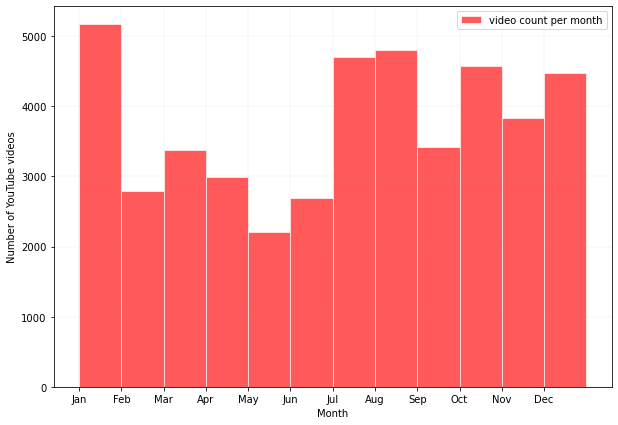

In [35]:
# Create a larger figure by specifying figsize
plt.figure(figsize=(10, 7))

# Add a grid
plt.grid(True, linewidth=0.1)

# Create a histogram
plt.hist(months, 
         weights=video_counts, 
         bins=np.arange(1, 14), 
         label="video count per month", 
         facecolor = 'r',
         edgecolor="white",
         alpha=0.65)

# Set custom tick labels on the x-axis (reversed)
plt.xticks(np.arange(1, 13)[::-1], 
           labels=['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])

# Label the axes
plt.xlabel('Month')
plt.ylabel('Number of YouTube videos')

# Add legend
plt.legend()

# Show the plot of aggregated number of videos watched over the months of a year.
plt.show()

### Plotting amount of watched YouTube videos per month from July 2020 to current month and year

In [36]:
# Sort the DataFrame by 'year' and 'month' in ascending order
sorted_df = df.sort_values(by=['year', 'month'])

# Count the number of observations for each month
watched_videos = sorted_df.groupby(['year', 'month']).size().reset_index(name='video_count')
watched_videos

,year,month,video_count
0,2020,7,372
1,2020,8,1010
2,2020,9,843
3,2020,10,918
4,2020,11,841
5,2020,12,755
6,2021,1,1520
7,2021,2,943
8,2021,3,1308
9,2021,4,619


In [38]:
# Recording the values of watched youtube videos for each month starting from 2020 to 2024.
years = watched_videos['year'].tolist()
all_months = watched_videos['month'].tolist()
all_watched = watched_videos['video_count'].tolist()
year_and_month = [f"{calendar.month_abbr[all_months]}{years}" for all_months, years in zip(all_months, years)]
bins = len(year_and_month)+1

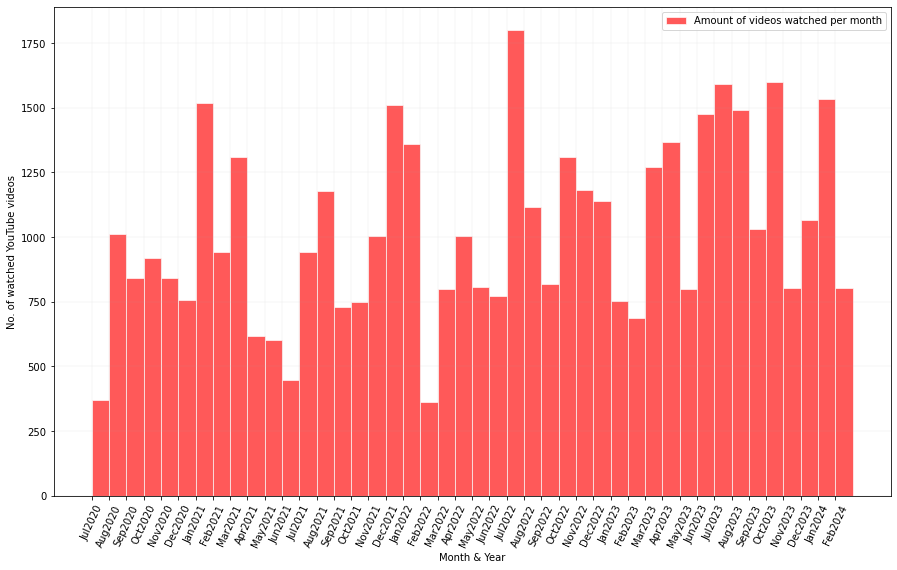

In [39]:
# Create a larger figure by specifying figsize
plt.figure(figsize=(15, 9))

# Add a grid
plt.grid(True, linewidth=0.1)

# Create a histogram
plt.hist(year_and_month, 
         weights=all_watched, 
         bins=np.arange(0, bins), 
         label="Amount of videos watched per month", 
         facecolor = 'r',
         edgecolor="white",
         alpha=0.65);

# Rotate text on x-axis
if (bins<=45):
    plt.xticks(rotation=65);
else: 
    plt.xticks(rotation=90);

# Label the axes
plt.xlabel('Month & Year')
plt.ylabel('No. of watched YouTube videos');

# Add legend
plt.legend();

# Show the plot
plt.show();

# 2. Amount of watched YouTube - Days & Hours

In [41]:
df['time'] = pd.to_datetime(df['time'])  # Ensure 'time' is a datetime object
df['time_of_day'] = df['time'].dt.strftime('%H:%M:%S')  # Create the 'time_of_day' column
df

,title,time,channel_name,year,month,day_of_the_week,time_of_day
0,"Watched Install Git on MacOS (Macbook M1, M1 M...",2024-02-18 15:16:21.549000+00:00,Code With Arjun,2024,2,Sunday,15:16:21
1,Watched Merab wrestled Bradley Martyn 😂 (via m...,2024-02-18 15:02:17.549000+00:00,ESPN MMA,2024,2,Sunday,15:02:17
2,Watched 5 Basic Essential Tactics for NOOBS! -...,2024-02-18 15:01:03.263000+00:00,Zerkovich,2024,2,Sunday,15:01:03
3,Watched Skaven Inventions in a Nutshell,2024-02-18 15:00:47.482000+00:00,Tarriff,2024,2,Sunday,15:00:47
4,Watched Ilia Topuria says featherweight divisi...,2024-02-18 14:53:49.346000+00:00,ESPN MMA,2024,2,Sunday,14:53:49
...,...,...,...,...,...,...,...
45039,Watched Bevis Arealfunktionen er en stamfunk...,2020-07-12 20:57:18.686000+00:00,Annepande,2020,7,Sunday,20:57:18
45040,Watched Tretrinsreglen - Bevis: Differentialkv...,2020-07-12 20:51:34.640000+00:00,KG MAT,2020,7,Sunday,20:51:34
45041,Watched https://www.youtube.com/watch?v=19FT6b...,2020-07-12 20:48:08.113000+00:00,None,2020,7,Sunday,20:48:08
45042,Watched Tame Impala - On Track (Acoustic Live),2020-07-12 20:46:59.003000+00:00,tameimpalaVEVO,2020,7,Sunday,20:46:59


In [42]:
# Define the order of days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


# Sort the DataFrame by day and time in ascending order
sorted_time = df.sort_values(by=['day_of_the_week', 'time_of_day'])

# Convert 'day_of_week' to Categorical with the specified order
sorted_time['day_of_the_week'] = pd.Categorical(sorted_time['day_of_the_week'], categories=day_order, ordered=True)

# Count the number of observations per day of the week
sorted_day = sorted_time.groupby(['day_of_the_week']).size().reset_index(name='No. watched videos')

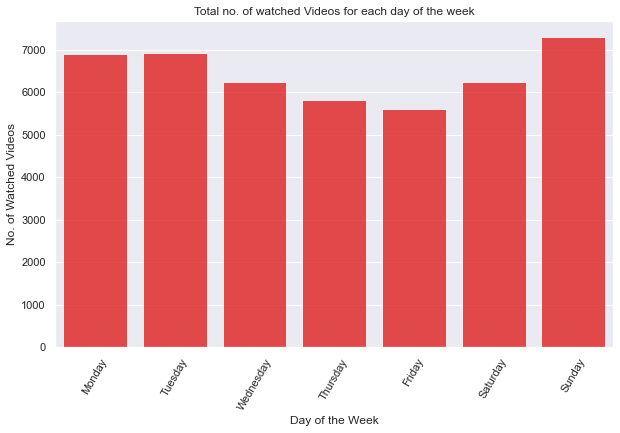

,day_of_the_week,No. watched videos
0,Monday,6896
1,Tuesday,6917
2,Wednesday,6247
3,Thursday,5818
4,Friday,5615
5,Saturday,6243
6,Sunday,7308


In [43]:
sns.set_theme(style="darkgrid")
df1 = sorted_day 

plt.figure(figsize=(10, 6))  

sns.barplot(
    data=df1, 
    x="day_of_the_week", 
    y="No. watched videos", 
    color="red", 
    alpha=0.8
)
plt.xticks(rotation=60)
plt.title("Total no. of watched Videos for each day of the week")
plt.xlabel("Day of the Week")
plt.ylabel("No. of Watched Videos")

plt.show()
sorted_day

## Daily watching trends comparing each year

In [46]:
# Filter rows starting with the year 2020
df_2023_unsorted = df[df['time'].dt.year == 2023]
df_2022_unsorted = df[df['time'].dt.year == 2022]
df_2021_unsorted = df[df['time'].dt.year == 2021]
df_2020_unsorted = df[df['time'].dt.year == 2020]

# Using function to see the results for each year
result_2023 = func.process_yearly_data(df_2023_unsorted, 2023)
result_2022 = func.process_yearly_data(df_2022_unsorted, 2022)
result_2021 = func.process_yearly_data(df_2021_unsorted, 2021)
result_2020 = func.process_yearly_data(df_2020_unsorted, 2020)

# Create a list of your dataframes for different years 
dataframes = [result_2020, result_2021, result_2022, result_2023] 

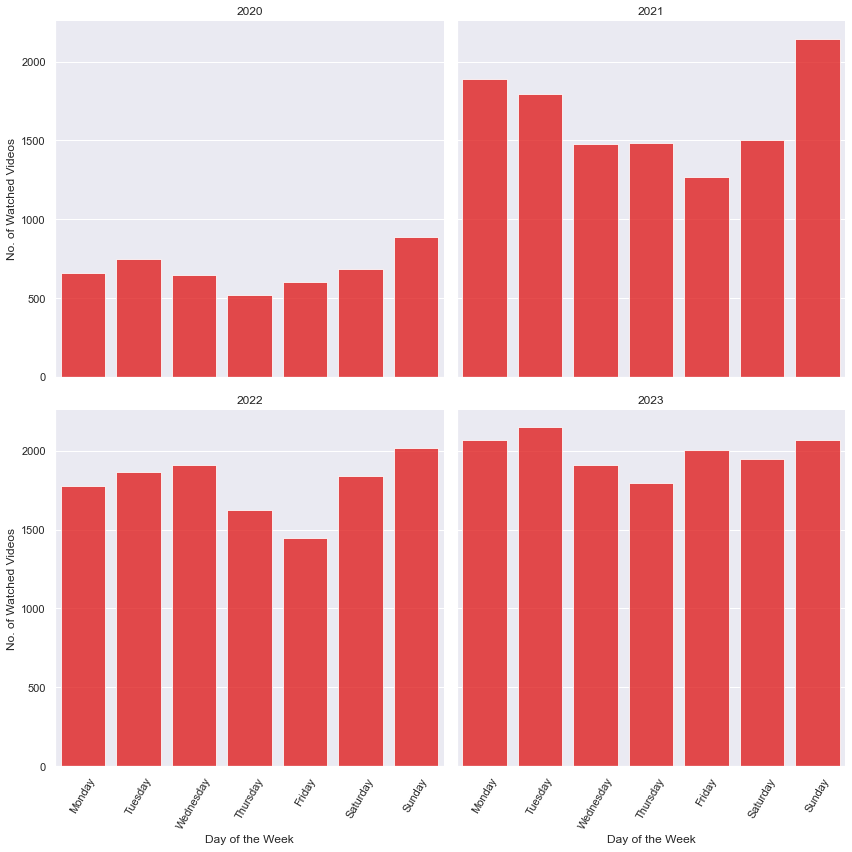

,year,day_of_the_week,No. watched videos
0,2020,Monday,658
1,2020,Tuesday,745
2,2020,Wednesday,646
3,2020,Thursday,517
4,2020,Friday,604
5,2020,Saturday,683
6,2020,Sunday,886
0,2021,Monday,1891
1,2021,Tuesday,1795
2,2021,Wednesday,1474


In [49]:
# Set the Seaborn style
sns.set_theme(style="darkgrid")

# Create a list of your dataframes for different years (assuming you have result_2020, result_2021, etc.)
dataframes = [result_2020, result_2021, result_2022, result_2023]  

# Combine the dataframes into one
combined_df = pd.concat(dataframes)

# Create a FacetGrid for each year with increased height
g = sns.FacetGrid(combined_df, col="year", col_wrap=2, height=6)  # Adjust the height as needed

# Create histograms with counts using sns.barplot
g.map_dataframe(sns.barplot, x="day_of_the_week", y="No. watched videos", color="red", alpha=0.8)

# Set labels and titles
g.set_axis_labels("Day of the Week", "No. of Watched Videos")
g.set_titles(col_template="{col_name}")

# Rotate x-axis text by 60 degrees
g.set_xticklabels(rotation=60)

# Adjust the layout
g.tight_layout()

# Show the facet grid
plt.show()

# Show the aggregated data for each year
combined_df

## Hourly watching trends from 2020-2023

In [51]:
df = df.copy()

# Set the values without triggering the warning
df['day_of_the_week'] = df['time'].dt.day_name()

#Insert the hour component
df['hour'] = df['time'].dt.hour

# Create a DataFrame for each year with the number of watched videos per hour
per_hour_2020 = func.df_by_hour(df_2020_unsorted)
per_hour_2021 = func.df_by_hour(df_2021_unsorted)
per_hour_2022 = func.df_by_hour(df_2022_unsorted)
per_hour_2023 = func.df_by_hour(df_2023_unsorted)

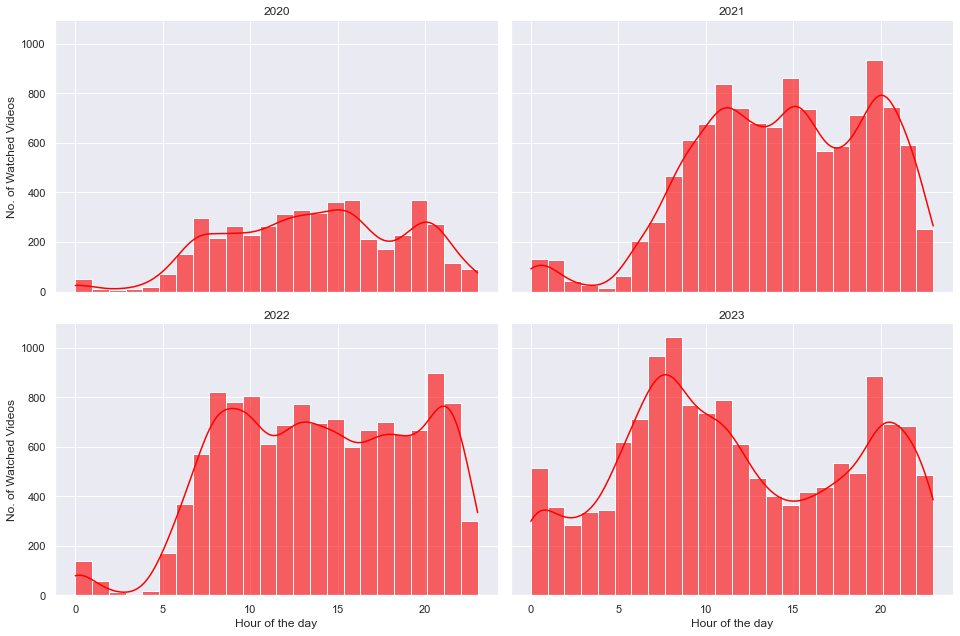

In [52]:
# Set the Seaborn style
sns.set_theme(style="darkgrid")

# Create a list of your dataframes for different years
dataframes = [per_hour_2020, per_hour_2021, per_hour_2022, per_hour_2023]  # Add your dataframes here

# Combine the dataframes into one
combined_df = pd.concat(dataframes)

# Create a FacetGrid for each year with increased height
g = sns.FacetGrid(combined_df, col="year", col_wrap=2, height=4.5, aspect=1.5)  # Adjust the height as needed

# Create histograms with counts using sns.histplot
g.map_dataframe(sns.histplot, x="hour", color="red", kde=True, bins=24, alpha=0.6)

# Set labels and titles
g.set_axis_labels("Hour of the day", "No. of Watched Videos")
g.set_titles(col_template="{col_name}")

# Adjust the layout
g.tight_layout()

# Show the facet grid
plt.show()

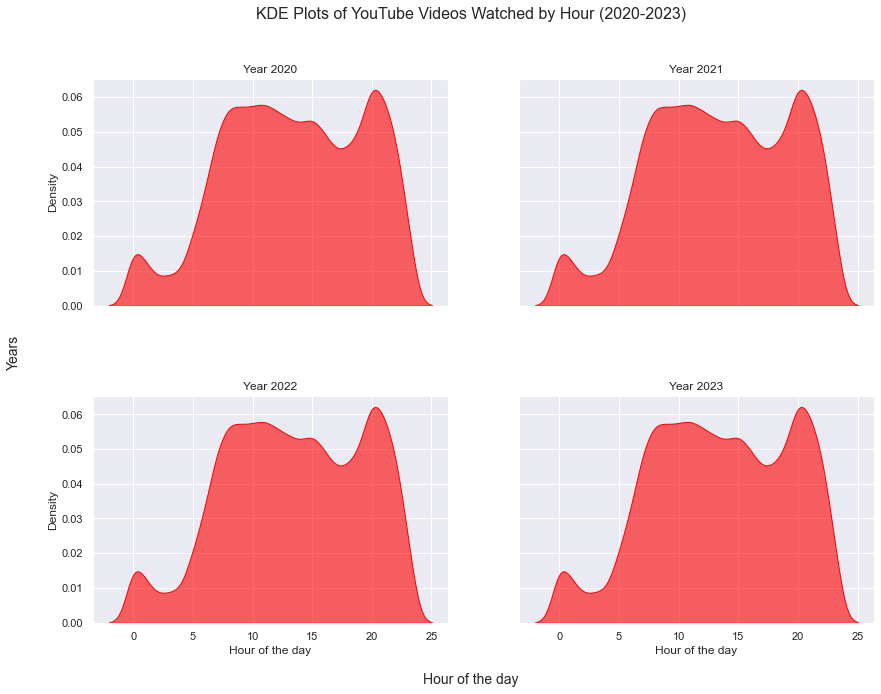

In [53]:
# Create a copy, in order for the df to have the same properties after this cell
copy = df.copy()

# Set the Seaborn style
sns.set_theme(style="darkgrid")

# Create a list of your dataframes for different years
dataframes = [per_hour_2020, per_hour_2021, per_hour_2022, per_hour_2023]  

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.2, hspace=0.4)  

# List of years for labeling
years = [2020, 2021, 2022, 2023]

# Loop through dataframes and years, and plot KDE on each subplot
for ax, copy, year in zip(axes.flat, dataframes, years):
    sns.kdeplot(data=df, x="hour", color="red", fill=True, alpha=0.6, ax=ax)
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Hour of the day")
    ax.set_ylabel("Density")

# Set common labels and title
fig.text(0.5, 0.04, "Hour of the day", ha="center", fontsize=14)
fig.text(0.04, 0.5, "Years", va="center", rotation="vertical", fontsize=14)
fig.suptitle("KDE Plots of YouTube Videos Watched by Hour (2020-2023)", fontsize=16)

# Show the figure
plt.show()

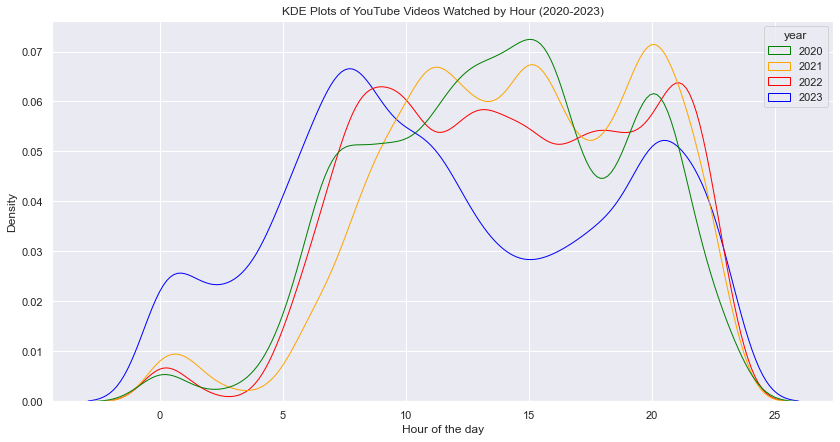

In [54]:
# Define custom colors for each year
custom_colors = ["green", "orange", "red", "blue"]

# Combine the dataframes into one
combined_df = pd.concat([per_hour_2020, per_hour_2021, per_hour_2022, per_hour_2023])

# Reset the index to ensure unique labels
combined_df.reset_index(drop=True, inplace=True)

# Set the Seaborn style
sns.set_theme(style="darkgrid")

# Create a single figure
plt.figure(figsize=(14, 7))

# Plot a KDE for each year's data in the combined dataframe with custom colors
sns.kdeplot(data=combined_df, x="hour", hue="year", common_norm=False, fill=True, alpha=0.0, palette=custom_colors)

# Set labels and title
plt.xlabel("Hour of the day")
plt.ylabel("Density")
plt.title("KDE Plots of YouTube Videos Watched by Hour (2020-2023)")

# Show the combined KDE plot
plt.show()

In [55]:
df = df.copy()

# Count the number of observations for each hour of the day
watched_per_hour = df.groupby(['hour']).size().reset_index(name='no. watched')
watched_per_hour

,hour,no. watched
0,0,857
1,1,577
2,2,351
3,3,399
4,4,411
5,5,935
6,6,1467
7,7,2253
8,8,2612
9,9,2572


In [56]:
watched_per_hour = func.df_by_hour(df) # Create a DataFrame with the number of watched videos per hour for all years

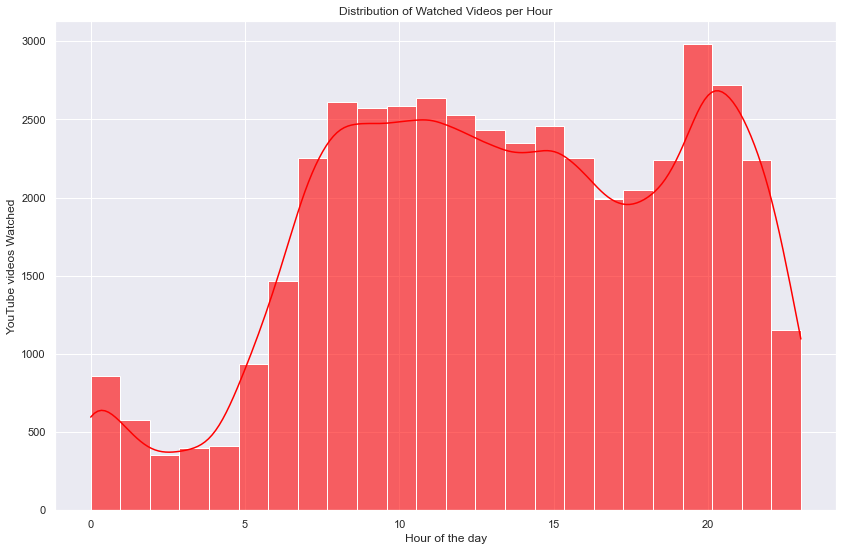

In [57]:
# Set the Seaborn style
sns.set_theme(style="darkgrid")

# Assuming you have the DataFrame 'watched_per_hour' with the given data
plt.figure(figsize=(14, 9))

# Create the displot with histogram and KDE plot
sns.histplot(data=watched_per_hour, x='hour', kde=True, color='red', bins=24, alpha=0.6)

# Set labels and title
plt.xlabel('Hour of the day')
plt.ylabel('YouTube videos Watched')
plt.title('Distribution of Watched Videos per Hour')

# Show the plot
plt.show()

In [58]:
# Convert 'day_of_week' to Categorical with the specified order
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=day_order, ordered=True)
df

,title,time,channel_name,year,month,day_of_the_week,time_of_day,hour
0,"Watched Install Git on MacOS (Macbook M1, M1 M...",2024-02-18 15:16:21.549000+00:00,Code With Arjun,2024,2,Sunday,15:16:21,15
1,Watched Merab wrestled Bradley Martyn 😂 (via m...,2024-02-18 15:02:17.549000+00:00,ESPN MMA,2024,2,Sunday,15:02:17,15
2,Watched 5 Basic Essential Tactics for NOOBS! -...,2024-02-18 15:01:03.263000+00:00,Zerkovich,2024,2,Sunday,15:01:03,15
3,Watched Skaven Inventions in a Nutshell,2024-02-18 15:00:47.482000+00:00,Tarriff,2024,2,Sunday,15:00:47,15
4,Watched Ilia Topuria says featherweight divisi...,2024-02-18 14:53:49.346000+00:00,ESPN MMA,2024,2,Sunday,14:53:49,14
...,...,...,...,...,...,...,...,...
45039,Watched Bevis Arealfunktionen er en stamfunk...,2020-07-12 20:57:18.686000+00:00,Annepande,2020,7,Sunday,20:57:18,20
45040,Watched Tretrinsreglen - Bevis: Differentialkv...,2020-07-12 20:51:34.640000+00:00,KG MAT,2020,7,Sunday,20:51:34,20
45041,Watched https://www.youtube.com/watch?v=19FT6b...,2020-07-12 20:48:08.113000+00:00,None,2020,7,Sunday,20:48:08,20
45042,Watched Tame Impala - On Track (Acoustic Live),2020-07-12 20:46:59.003000+00:00,tameimpalaVEVO,2020,7,Sunday,20:46:59,20


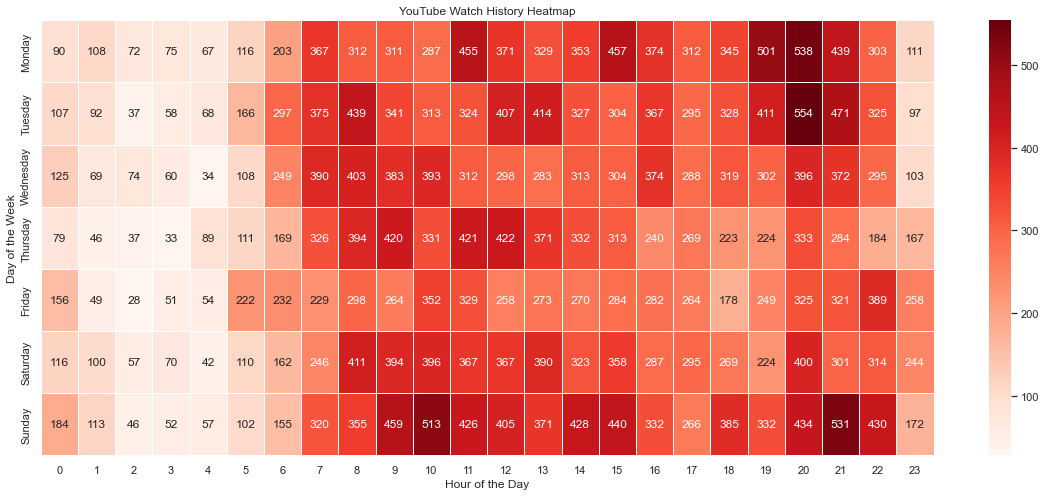

In [59]:
# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = df.pivot_table(index='day_of_the_week', columns='hour', values='title', aggfunc='count')

# Define a custom color palette
custom_palette = sns.color_palette("Reds", as_cmap=True)

# Set the Seaborn style
sns.set_theme(style="whitegrid")

# Create a larger figure by specifying figsize
plt.figure(figsize=(20, 8))

# Create the heatmap
sns.heatmap(heatmap_data, cmap=custom_palette, annot=True, fmt='g', linewidths=0.5)

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('YouTube Watch History Heatmap')

# Show the plot
plt.show()

# 3. Most watched YouTube content

In [60]:
df

,title,time,channel_name,year,month,day_of_the_week,time_of_day,hour
0,"Watched Install Git on MacOS (Macbook M1, M1 M...",2024-02-18 15:16:21.549000+00:00,Code With Arjun,2024,2,Sunday,15:16:21,15
1,Watched Merab wrestled Bradley Martyn 😂 (via m...,2024-02-18 15:02:17.549000+00:00,ESPN MMA,2024,2,Sunday,15:02:17,15
2,Watched 5 Basic Essential Tactics for NOOBS! -...,2024-02-18 15:01:03.263000+00:00,Zerkovich,2024,2,Sunday,15:01:03,15
3,Watched Skaven Inventions in a Nutshell,2024-02-18 15:00:47.482000+00:00,Tarriff,2024,2,Sunday,15:00:47,15
4,Watched Ilia Topuria says featherweight divisi...,2024-02-18 14:53:49.346000+00:00,ESPN MMA,2024,2,Sunday,14:53:49,14
...,...,...,...,...,...,...,...,...
45039,Watched Bevis Arealfunktionen er en stamfunk...,2020-07-12 20:57:18.686000+00:00,Annepande,2020,7,Sunday,20:57:18,20
45040,Watched Tretrinsreglen - Bevis: Differentialkv...,2020-07-12 20:51:34.640000+00:00,KG MAT,2020,7,Sunday,20:51:34,20
45041,Watched https://www.youtube.com/watch?v=19FT6b...,2020-07-12 20:48:08.113000+00:00,None,2020,7,Sunday,20:48:08,20
45042,Watched Tame Impala - On Track (Acoustic Live),2020-07-12 20:46:59.003000+00:00,tameimpalaVEVO,2020,7,Sunday,20:46:59,20


In [61]:
df["channel_name"].describe()

count             41854
unique            12461
top       theneedledrop
freq                952
Name: channel_name, dtype: object

In [62]:
views_channel = df.groupby(df['channel_name'],dropna=False)['channel_name'].count() # Count the number of videos watched per channel
views_channel = views_channel.sort_values(ascending=False).head(20) # Sort the values in descending order and select the top 20

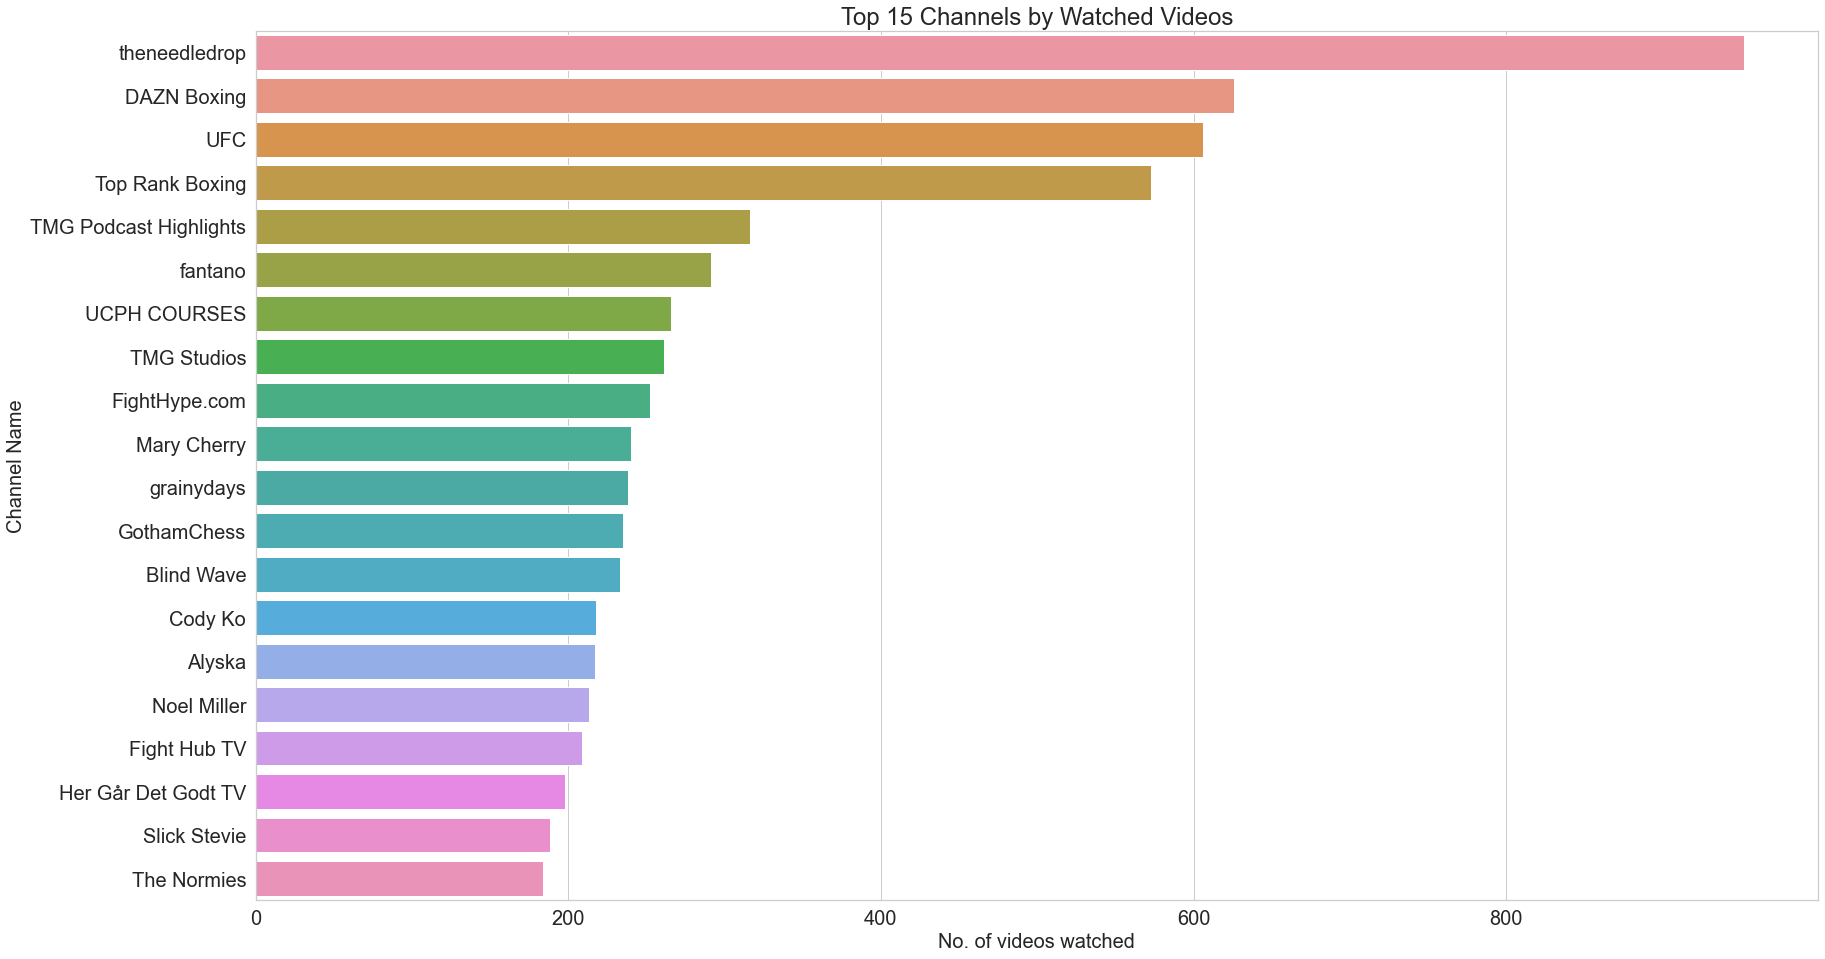

In [63]:
# Creat plot by view_channel
plt.figure(figsize=(28, 16))
ax = sns.barplot(x=views_channel, y=views_channel.index, alpha=1)

# Set x-axis and y-axis labels without variable names
ax.set_xlabel('')
ax.set_ylabel('Channel Name', fontsize=20)

# Set a title
plt.xlabel('No. of videos watched', fontsize=20)
plt.title('Top 15 Channels by Watched Videos', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# Conclusion

In summary, the year I have watched the most YouTube videos so far was 2022, with a count of 12392 videos in total. In the past four years, I watched the most videos in July 2022, with a count of 1813. 

I have watched the most videos on Sundays in the interval 2020 to 2023 where I have watched 6775 videos. The hour I'm most active is between 19:00 and 20:00, where we counted 2623 videos watched in this time interval for the past four years. However, from the heatmap, we found that from 2020 to 2023, the day and hour of the week I'm most active is between 20:00 and 21:00 on Mondays, with a total count of 500 videos. 

The channel I have watched the most in the past four years is called theneedledrop, which is a music critic YouTube channel. His channel is also consistently on the top five channels I watch the most, in the four year interval. Mixed martial arts channels (such as Top Rank, the UFC and DAZN Boxing) are the second most watched content in the four years, slowly taking a higher and higher spot each year on the top five.